In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
#prop_elem = pd.read_csv('prop_elem_AstFam.csv')
#prop_elem = pd.read_csv('prop_elem_AstFam_1freq.csv')
prop_elem = pd.read_csv('prop_elem_AstFam_1freq_spr.csv') #Good sinI, bad ecc
prop_elem = pd.read_csv('prop_elem_AstFam_3 freq.csv')
#prop_elem = pd.read_csv('prop_elem_AstFam_500.csv')
#prop_elem = pd.read_csv('prop_elem_AstFam_8p.csv')
#prop_elem = pd.read_csv('prop_elem_AstFam_8p_1.csv')
#prop_elem = pd.read_csv('prop_elem_AstFam_secres.csv')
#prop_elem = pd.read_csv('prop_elem_AstFam_secres_gs0.csv') # Ok
#prop_elem = pd.read_csv('prop_elem_AstFam_secres_gs1.csv')
#prop_elem = pd.read_csv('prop_elem_AstFam_secres_gs2.csv')
#prop_elem = pd.read_csv('prop_elem_AstFam_secres_spr1.csv') #Ok
prop_elem = pd.read_csv('prop_elem_AstFam_secres_spr4.csv')
#prop_elem = pd.read_csv('prop_elem_AstFam_secres_test.csv')
#prop_elem = pd.read_csv('prop_elem_AstFam_secres_vs.csv')
prop_elem = pd.read_csv('prop_elem_AstFam_secres_set.csv')
prop_elem = pd.read_csv('prop_elem_AstFam_secres_orbfit.csv')
#prop_elem = pd.read_csv('prop_elem_AstFam_secres_orbfit_all.csv')
#prop_elem = pd.read_csv('prop_elem_tnos_multi_ident.csv')


AstFam = pd.read_csv('AstFam_data.csv')
AstDys = pd.read_csv('Asteroids_data.csv')
AstFam_sig = pd.read_csv('AstFam_sig.txt')
AstDys_sig = pd.read_csv('AstDys_sig.txt')

names1 = np.array(AstDys['Name'])
names2 = np.array(AstDys_sig['Name'])
names3 = np.array(AstFam['Name'])
names4 = np.array(AstFam_sig['Name'])
names5 = np.array(prop_elem['Name'])

plt.rcParams['font.size'] = 11
prop_elem = prop_elem.loc[prop_elem['Name'].isin(names1)]
AstFam = AstFam.loc[AstFam['Name'].isin(names1)]
AstDys = AstDys.loc[AstDys['Name'].isin(names1)]
AstFam_sig = AstFam_sig.loc[AstFam_sig['Name'].isin(names1)]
AstDys_sig = AstDys_sig.loc[AstDys_sig['Name'].isin(names1)]

prop_elem = prop_elem.loc[prop_elem['Name'].isin(names2)]
AstFam = AstFam.loc[AstFam['Name'].isin(names2)]
AstDys = AstDys.loc[AstDys['Name'].isin(names2)]
AstFam_sig = AstFam_sig.loc[AstFam_sig['Name'].isin(names2)]
AstDys_sig = AstDys_sig.loc[AstDys_sig['Name'].isin(names2)]

prop_elem = prop_elem.loc[prop_elem['Name'].isin(names3)]
AstFam = AstFam.loc[AstFam['Name'].isin(names3)]
AstDys = AstDys.loc[AstDys['Name'].isin(names3)]
AstFam_sig = AstFam_sig.loc[AstFam_sig['Name'].isin(names3)]
AstDys_sig = AstDys_sig.loc[AstDys_sig['Name'].isin(names3)]

prop_elem = prop_elem.loc[prop_elem['Name'].isin(names4)]
AstFam = AstFam.loc[AstFam['Name'].isin(names4)]
AstDys = AstDys.loc[AstDys['Name'].isin(names4)]
AstFam_sig = AstFam_sig.loc[AstFam_sig['Name'].isin(names4)]
AstDys_sig = AstDys_sig.loc[AstDys_sig['Name'].isin(names4)]

prop_elem = prop_elem.loc[prop_elem['Name'].isin(names5)]
AstFam = AstFam.loc[AstFam['Name'].isin(names5)]
AstDys = AstDys.loc[AstDys['Name'].isin(names5)]
AstFam_sig = AstFam_sig.loc[AstFam_sig['Name'].isin(names5)]
AstDys_sig = AstDys_sig.loc[AstDys_sig['Name'].isin(names5)]

prop_elem = prop_elem.reset_index()
AstFam = AstFam.reset_index()
AstDys = AstDys.reset_index()
AstFam_sig = AstFam_sig.reset_index()
AstDys_sig = AstDys_sig.reset_index()

res = np.zeros(len(prop_elem))
res31up = np.where(prop_elem['sma'] < 2.55)
res21up = np.where(prop_elem['sma'] < 3.329)
res52up = np.where(prop_elem['sma'] < 2.875)
res73up = np.where(prop_elem['sma'] < 3.008)

res31down = np.where(prop_elem['sma'] > 2.45)
res21down = np.where(prop_elem['sma'] > 3.229)
res52down = np.where(prop_elem['sma'] > 2.775)
res73down = np.where(prop_elem['sma'] > 2.908)

res31 = np.intersect1d(res31up,res31down)
res21 = np.intersect1d(res21up,res21down)
res52 = np.intersect1d(res52up,res52down)
res73 = np.intersect1d(res73up,res73down)

res = np.concatenate([res31,res21,res52,res73],axis=None)
res = np.sort(res)

noneject = np.where(np.abs(prop_elem['sma']) < 10)
prop_elem = prop_elem.loc[noneject]
AstFam = AstFam.loc[noneject]
AstFam_sig = AstFam_sig.loc[noneject]
AstDys = AstDys.loc[noneject]
AstDys_sig = AstDys_sig.loc[noneject]

fig,ax = plt.subplots(2,2,figsize=(16,8))
print(prop_elem['sma'][161])
ax[0,0].scatter(prop_elem['sma'],prop_elem['calc_sinI']-AstFam['sinI'],s=10)
#plt.scatter(prop_elem['sma'][res],prop_elem['calc_sinI'][res]-AstFam['sinI'][res],s=10,c='r')
ax[0,0].errorbar(prop_elem['sma'],prop_elem['calc_sinI']-AstFam['sinI'], yerr=AstFam_sig['sinI'], xerr=None,fmt='none')
ax[0,0].set_xlabel('SMA (AU)')
ax[0,0].set_ylabel('AstFam SinI Residuals')
ax[0,0].set_title('Asteroid Families Portal-SBDynT Residuals',fontsize=16)
ax[0,0].set_ylim(-0.04,0.04)



ax[1,0].scatter(prop_elem['sma'],prop_elem['calc_ecc']-AstFam['e'],s=5)
#plt.scatter(prop_elem['sma'][res],prop_elem['calc_ecc'][res]-AstFam['e'][res],s=10,c='r')
ax[1,0].errorbar(prop_elem['sma'],prop_elem['calc_ecc']-AstFam['e'], yerr=AstFam_sig['e'], xerr=None,fmt='none')
ax[1,0].set_xlabel('SMA (AU)')
ax[1,0].set_ylabel('AstFam Ecc Residuals')
ax[1,0].set_ylim(-0.1,0.1)


ax[0,1].scatter(prop_elem['sma'],np.array(prop_elem['calc_sinI'])-np.array(AstDys['sinI']),s=10)
#plt.scatter(prop_elem['sma'][res],prop_elem['calc_sinI'][res]-AstDys['sinI'][res],s=10,c='r')
ax[0,1].errorbar(prop_elem['sma'],np.array(prop_elem['calc_sinI'])-np.array(AstDys['sinI']), yerr=AstDys_sig['sinI'], xerr=None,fmt='none')
ax[0,1].set_xlabel('SMA (AU)')
ax[0,1].set_ylabel('AstDys SinI Residuals')
ax[0,1].set_title('AstDys-SBDynT Residuals',fontsize=16)
ax[0,1].set_ylim(-0.04,0.04)

ax[1,1].scatter(prop_elem['sma'],np.array(prop_elem['calc_ecc'])-np.array(AstDys['e']),s=10)
#plt.scatter(prop_elem['sma'][res],prop_elem['calc_ecc'][res]-AstDys['e'][res],s=10,c='r')
ax[1,1].errorbar(prop_elem['sma'],np.array(prop_elem['calc_ecc'])-np.array(AstDys['e']), yerr=AstDys_sig['e'], xerr=None,fmt='none')
ax[1,1].set_xlabel('SMA (AU)')
ax[1,1].set_ylabel('AstDys Ecc Residuals')
ax[1,1].set_ylim(-0.1,0.1)
#plt.scatter(prop_elem['sma'][170:180],np.array(prop_elem['calc_ecc'])[170:180]-np.array(AstDys['e'])[170:180],s=50,c='r')
#ax[1,1].scatter(prop_elem['sma'][120],np.array(prop_elem['calc_ecc'])[120]-np.array(AstDys['e'])[120],s=50,c='r')


print(prop_elem['Name'][170])

AstFam_resid_sini = prop_elem['calc_sinI']-AstFam['sinI']
AstFam_resid_e = prop_elem['calc_ecc']-AstFam['e']

AstDys_resid_sini = prop_elem['calc_sinI']-AstDys['sinI']
AstDys_resid_e = prop_elem['calc_ecc']-AstDys['e']

redsini = np.sum(AstFam_resid_sini**2)
rede = np.sum(AstFam_resid_e**2)
print('Resid reduced chi-square sinI: ', redsini)
print('Resid reduced chi-square ecc: ', rede)

redsini = np.sum(AstDys_resid_sini**2)
rede = np.sum(AstDys_resid_e**2)
print('Resid reduced chi-square sinI: ', redsini)
print('Resid reduced chi-square ecc: ', rede)

KeyError: 'sma'

In [275]:
AstFam_resid_sini = (prop_elem['calc_sinI']-AstFam['sinI']).values
AstFam_resid_e = (prop_elem['calc_ecc']-AstFam['e']).values

AstDys_resid_sini = prop_elem['calc_sinI']-AstDys['sinI']
AstDys_resid_e = prop_elem['calc_ecc']-AstDys['e']

low_i = np.where(AstFam_resid_sini < -0.04)
low_e = np.where(AstFam_resid_e < -0.04)

print(low_i[0])
print(prop_elem['Name'].values[316])
print(AstFam_resid_sini[low_i[0]])
print(prop_elem['calc_sinI'].values[low_i[0]])
print(AstFam['sinI'].values[low_i[0]])
#print(prop_elem['obs_ecc'][low_e[0]])
print(prop_elem['calc_ecc'][low_e[0]])
print(AstFam['e'][low_e[0]])

low_i = np.where(AstDys_resid_sini < -0.1)
low_e = np.where(AstDys_resid_e < -0.1)

#print(prop_elem['obs_sinI'][low_i[0]])
print(prop_elem['calc_sinI'][low_i[0]])
print(AstFam['sinI'][low_i[0]])

print(prop_elem['calc_ecc'][low_e[0]])
#print(prop_elem['obs_ecc'][low_e[0]])
print(AstFam['e'][low_e[0]])

[ 717 1795]
326.0
[-0.04877482 -0.24348176]
[0.16620518 0.14601144]
[0.21498   0.3894932]


KeyError: '[977] not in index'

In [276]:
prop_elem.to_csv('prop_elem_AstFam_3 freq.csv')

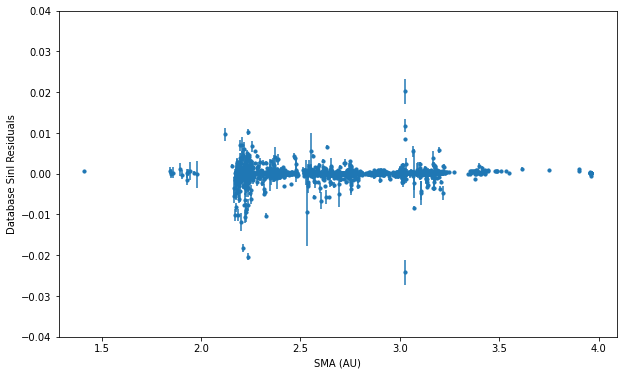

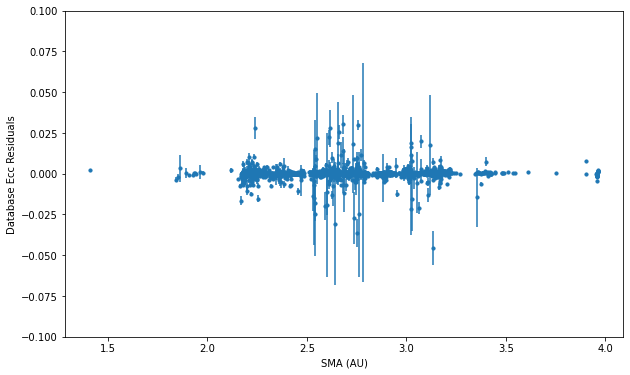

In [277]:
plt.figure(figsize=(10,6))
plt.scatter(prop_elem['sma'],np.array(AstFam['sinI'])-np.array(AstDys['sinI']),s=10)
#plt.scatter(prop_elem['sma'][res],AstFam['sinI'][res]-AstDys['sinI'][res],s=10,c='r')
plt.errorbar(prop_elem['sma'],np.array(AstFam['sinI'])-np.array(AstDys['sinI']), yerr=AstDys_sig['sinI'], xerr=None,fmt='none')
plt.xlabel('SMA (AU)')
plt.ylabel('Database SinI Residuals')
plt.ylim(-0.04,0.04)
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(prop_elem['sma'],np.array(AstFam['e'])-np.array(AstDys['e']),s=10)
#plt.scatter(prop_elem['sma'][res],AstFam['e'][res]-AstDys['e'][res],s=10,c='r')
plt.errorbar(prop_elem['sma'],np.array(AstFam['e'])-np.array(AstDys['e']), yerr=AstDys_sig['e'], xerr=None,fmt='none')
plt.xlabel('SMA (AU)')
plt.ylabel('Database Ecc Residuals')
plt.ylim(-0.1,0.1)
plt.show()



In [178]:
Ast_resid_sini = np.array(AstFam['sinI'])-np.array(AstDys['sinI'])
Ast_resid_e = np.array(AstFam['e'])-np.array(AstDys['e'])



low_i = np.where(Ast_resid_sini > 0.1)
low_e = np.where(Ast_resid_e > 0.1)

print(low_e[0])
print(prop_elem['Name'].values[440])
print(Ast_resid_e[low_e[0]])
print(AstDys['e'][low_e[0]])
print(AstFam['e'][low_e[0]])

redsini = np.sum(Ast_resid_sini**2)
rede = np.sum(Ast_resid_e**2)
print('Resid reduced chi-square sinI: ', redsini)
print('Resid reduced chi-square ecc: ', rede)

[ 440 1001 1327 1832]
454.0
[0.9259004 0.9181786 0.8245586 0.9214022]
440     0.139621
1001    0.104501
1327    0.235551
1832    0.175325
Name: e, dtype: float64
440     0.137265
1001    0.104502
1327    0.236155
1832    0.171851
Name: e, dtype: float64
Resid reduced chi-square sinI:  0.005557662342910001
Resid reduced chi-square ecc:  3.2529848022937604


In [168]:
thing = np.arange(100)

print(thing[35:36])
round(34.5)

[35]


34

In [25]:
# p1**2 = a1**3
# p2**2 = a2**3
# p1/p2 = 5:2
# a1**3/a2**3 = 25/4

perrat = (2/5)**2
print((37500**3*perrat)**(1/3))

20358.13212446179


In [26]:
from bin_to_df import bin_to_df

arc1 = rebound.archive('Sims/AstFam/175/archive_megno.bin')
ser = bin_to_df(arc1)

ModuleNotFoundError: No module named 'bin_to_df'